In [1]:
from pyoskar.core import Oskar
from pyoskar.sql import *
from pyoskar.analysis import *
from pyspark.sql.functions import col, udf, count, explode, concat, when, expr
from pyspark.sql.functions import *

oskar = Oskar(spark)
df = oskar.load("/home/roldanx/appl/oskar/oskar-spark/src/test/resources/platinum_chr22.small.parquet")
df.createOrReplaceTempView("platinum")

# Variant histogram

In [2]:
import numpy as np

pandasDF = oskar.histogram(df,"start",1000000).toPandas()
print(pandasDF)

       start  count
0   16000000    101
1   17000000    100
2   18000000     85
3   19000000     53
4   20000000     46
5   21000000     85
6   22000000     52
7   23000000     49
8   24000000     44
9   25000000     62
10  26000000     42
11  27000000     54
12  28000000     21
13  29000000     29
14  30000000     38
15  31000000     46
16  32000000     44
17  33000000     34
18  34000000     15


[Text(0, 0.5, 'Counts'), Text(0.5, 0, 'Region')]

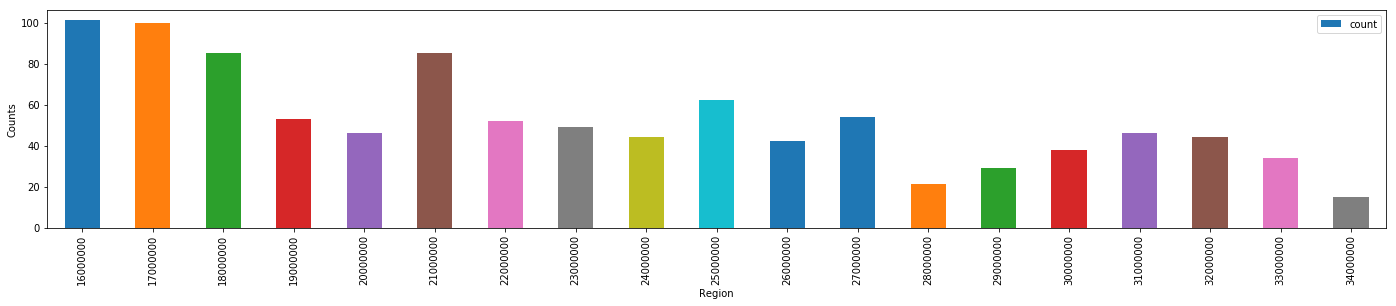

In [22]:
import pandas as pd

pandasDF = oskar.histogram(df,"start",1000000).toPandas()
histogram = pandasDF.plot(x = "start", y = "count", kind = "bar", figsize=(24,4))
histogram.set(xlabel="Region", ylabel="Counts")

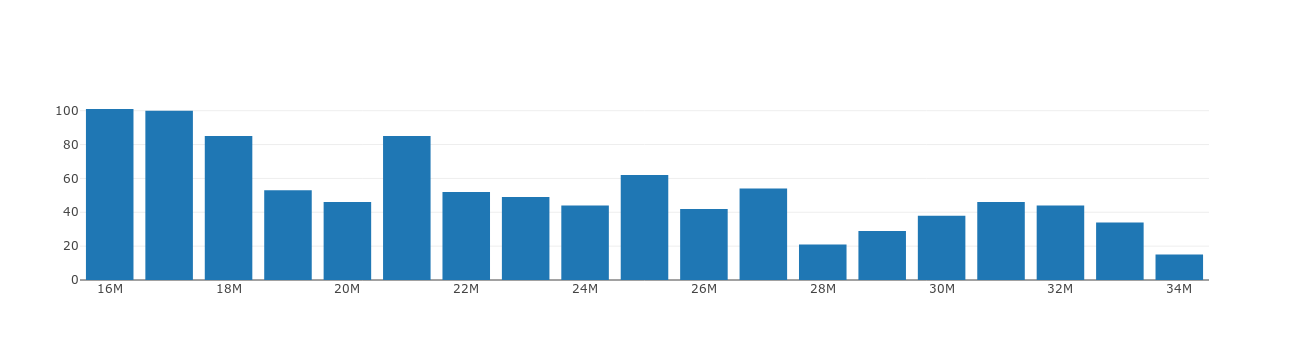

In [20]:
import pandas as pd
import numpy as np
import scipy as sp
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import get_plotlyjs, init_notebook_mode

pandasDF = oskar.histogram(df,"start",1000000).toPandas()

get_plotlyjs()
init_notebook_mode(connected=True)

data = [go.Bar(x=pandasDF["start"], y=pandasDF["count"])]
py.iplot(data)

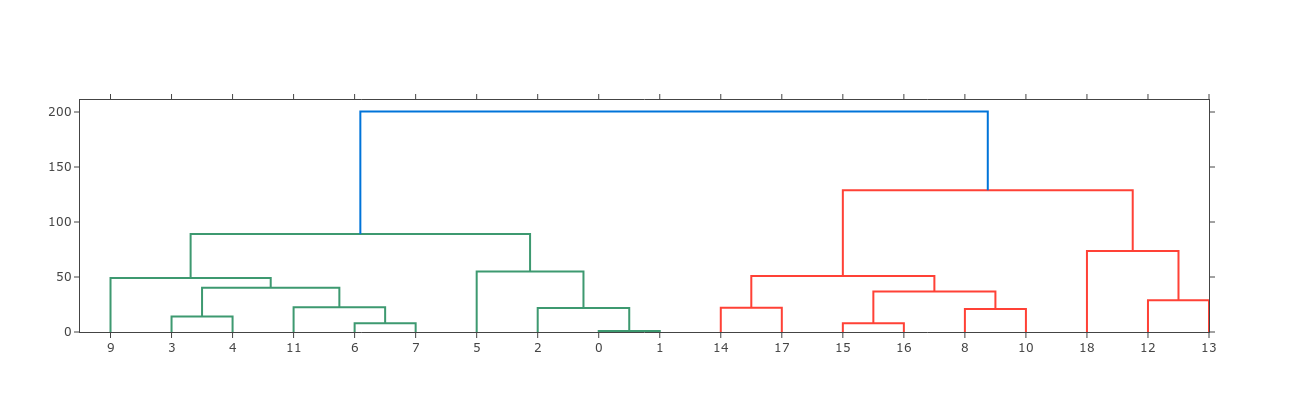

In [43]:
import plotly.offline as py
import plotly.figure_factory as ff
from plotly.offline import get_plotlyjs, init_notebook_mode

import numpy as np

init_notebook_mode(connected=True)

pandasDF = oskar.histogram(df,"start",1000000).toPandas()
# print(pandasDF)
dim = len(pandasDF["count"])
X = np.zeros((dim, dim))
for i in range(dim):
    for j in range(i,dim):
        X[j, i] = pandasDF["count"][i] - pandasDF["count"][j]
# print(X)
# labels = [pandasDF["start"]]
fig = ff.create_dendrogram(X)
fig['layout'].update({'width':1440, 'height':400})
py.iplot(fig, filename='dendrogram_with_labels')

# Con extensión renderizando con Plotly Python

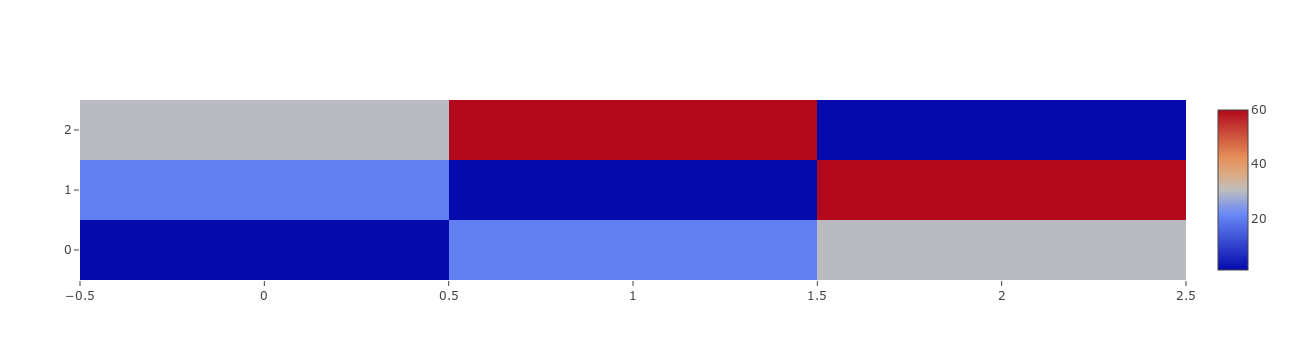

In [8]:
import plotly
from plotly.offline import iplot

trace = plotly.graph_objs.Heatmap(z=[[1, 20, 30],
                      [20, 1, 60],
                      [30, 60, 1]])

fig = dict(data=[trace])

iplot(fig)

# Con extensión renderizando con Plotly JSON

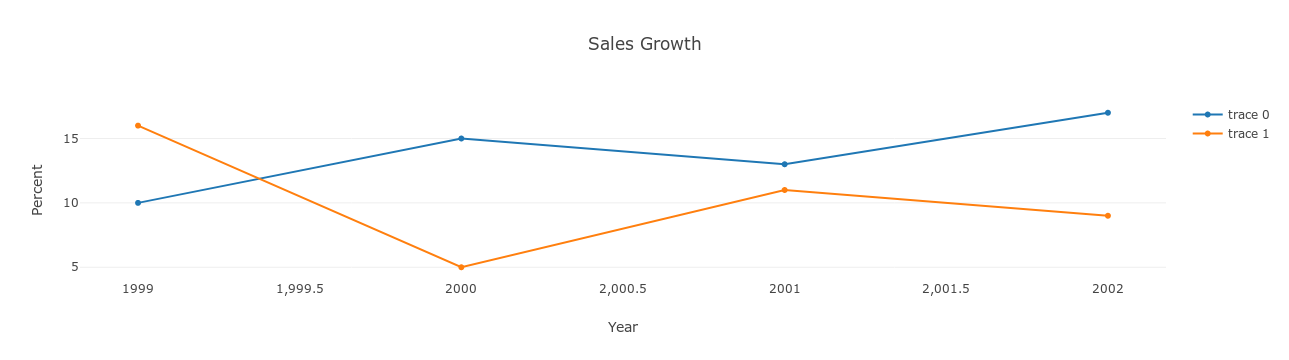

In [9]:
from IPython.display import display

def Plotly(data=[], layout={}):
    bundle = {}
    bundle['application/vnd.plotly.v1+json'] = {
        'data': data,
        'layout': layout,
    }
    display(bundle, raw=True)

data = [
    {'x': [1999, 2000, 2001, 2002], 'y': [10, 15, 13, 17], 'type': 'scatter'},
    {'x': [1999, 2000, 2001, 2002], 'y': [16, 5, 11, 9], 'type': 'scatter'}
]

layout = {
    'title': 'Sales Growth',
    'xaxis': {'title': 'Year', 'showgrid': False, 'zeroline': False},
    'yaxis': {'title': 'Percent', 'showline': False}
}

Plotly(data, layout)